In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV

In [26]:
cancer = pd.read_csv('BreastCancer.csv').set_index('Code')

In [27]:
X = cancer.drop('Class',axis=1)
y = cancer['Class']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=24, test_size=0.3, stratify=y)

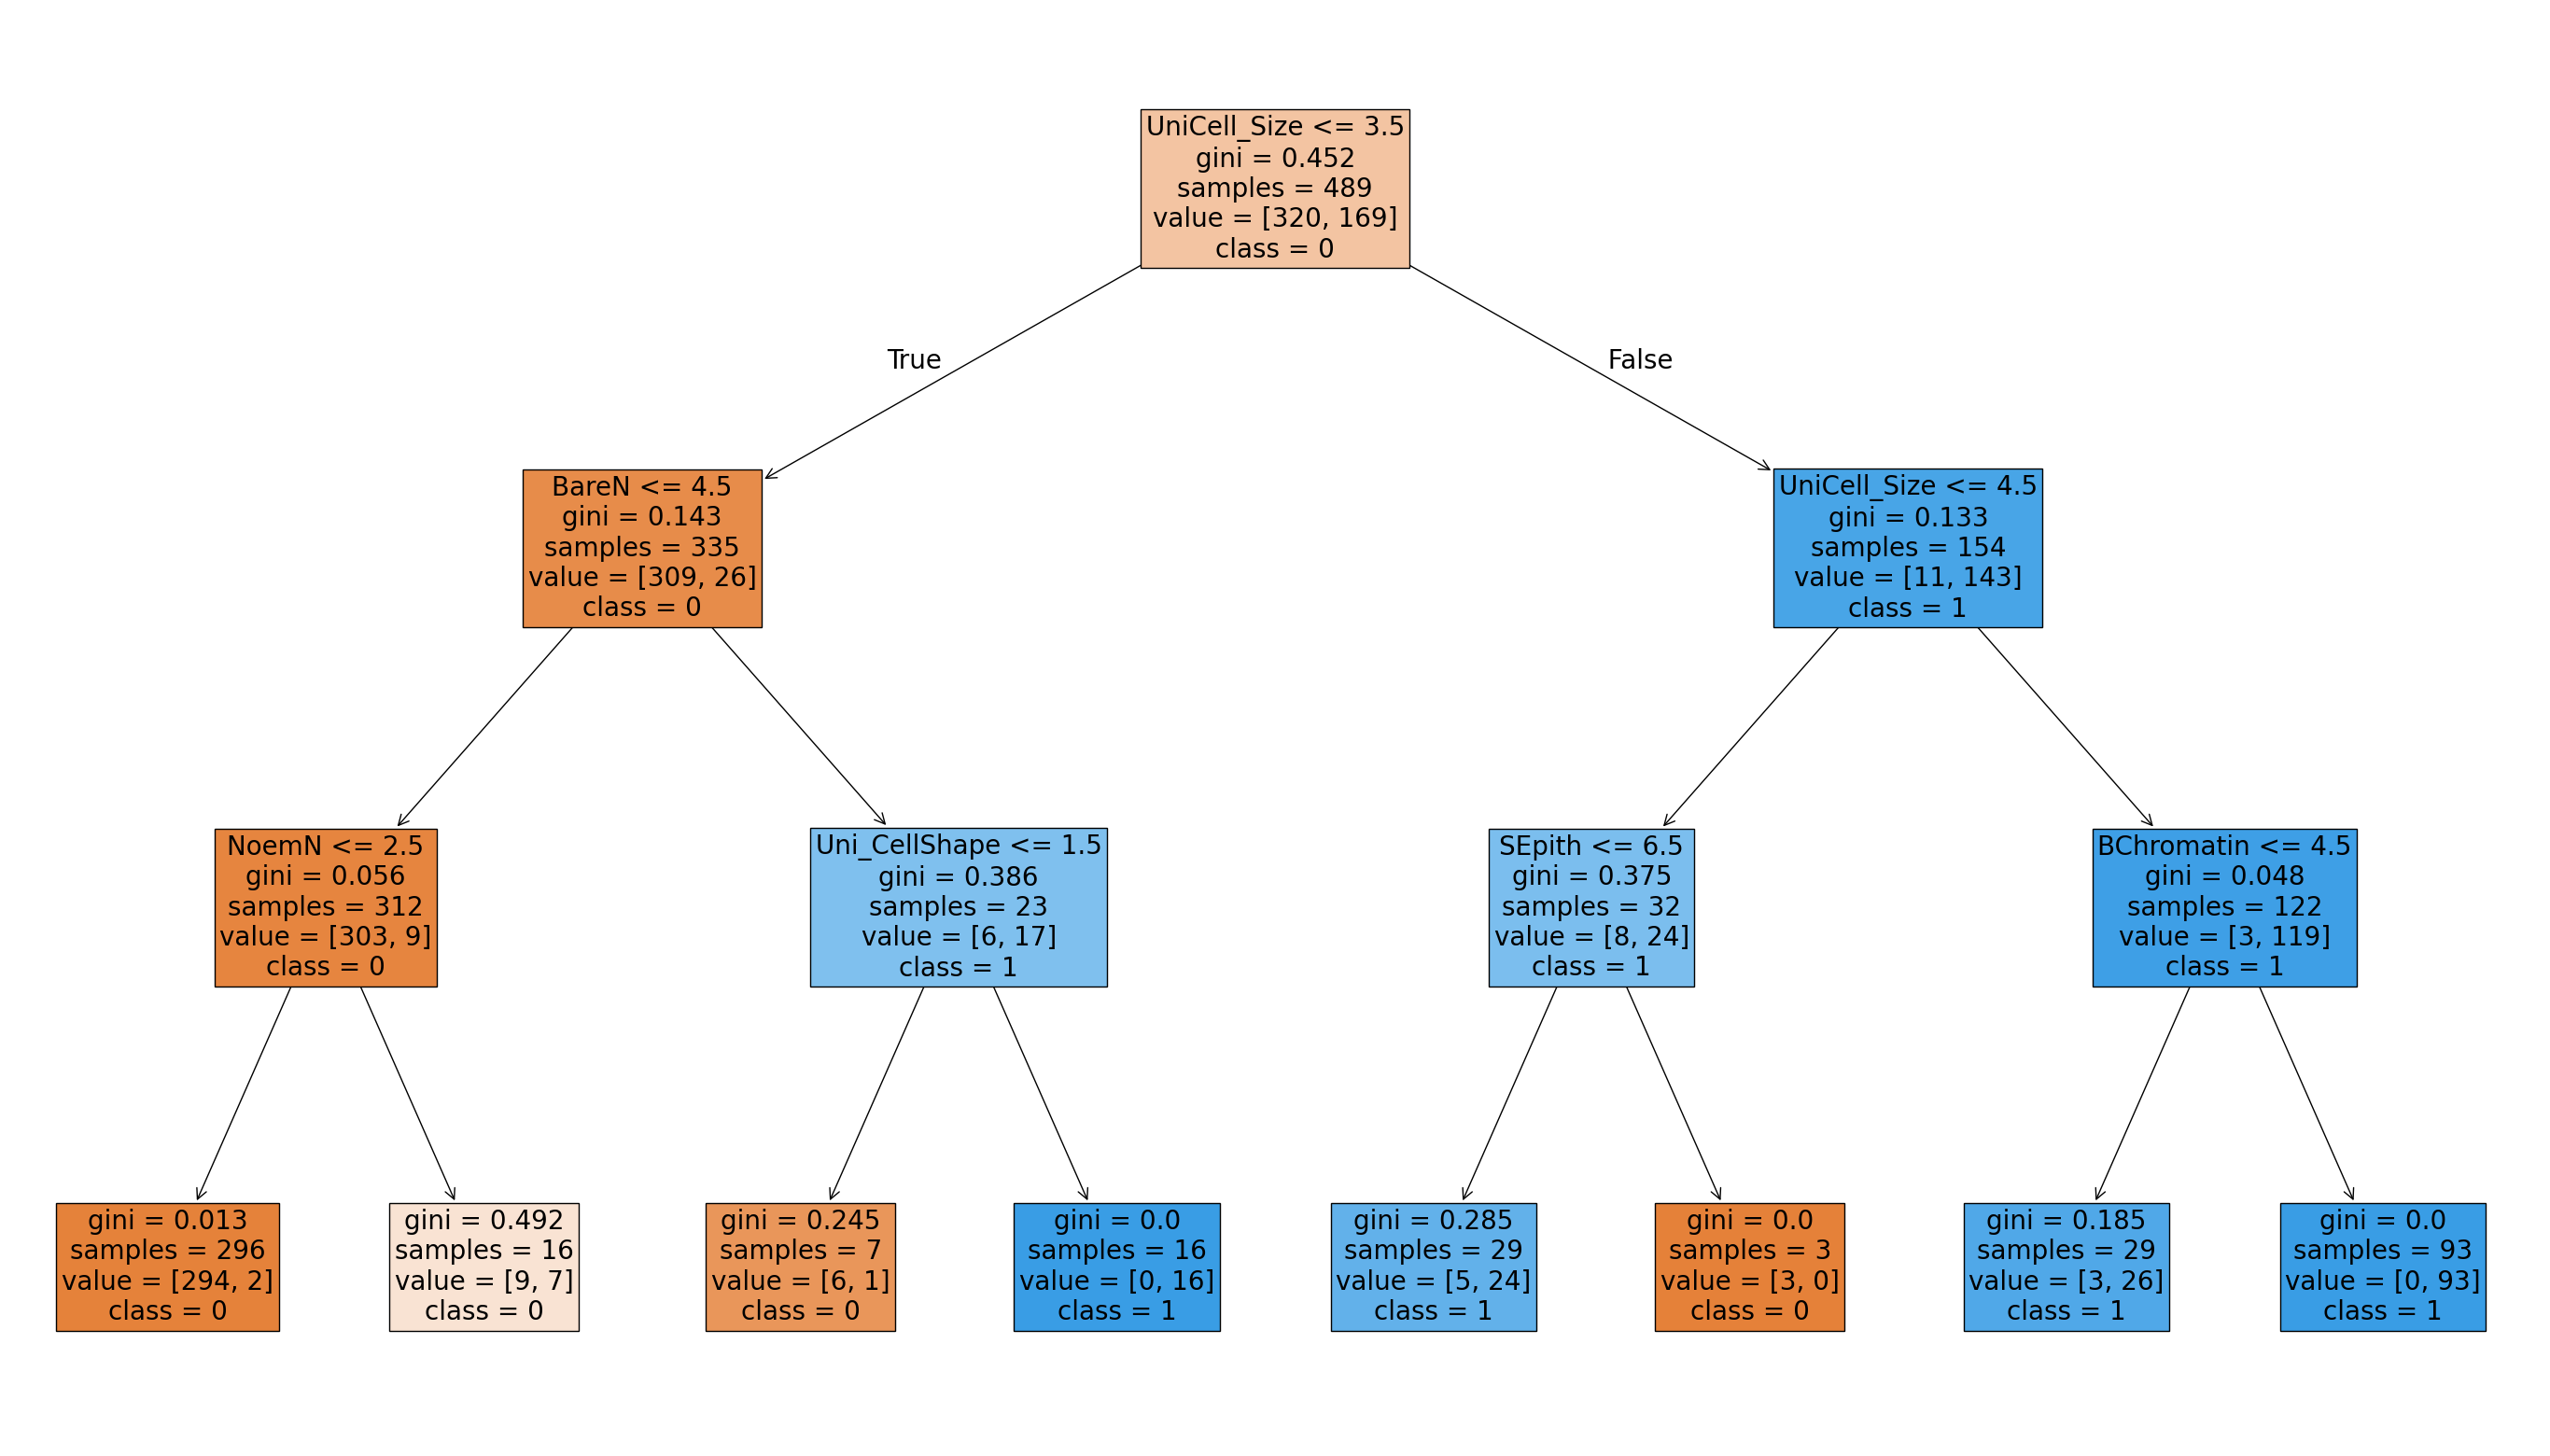

In [30]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=3)
dtc.fit(X_train, y_train)

plt.figure(figsize=(35,20))

plot_tree(dtc, feature_names=list(X.columns), class_names=['0','1'], filled= True, fontsize=20)
plt.show()

In [31]:
y_pred = dtc.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.9571428571428572


In [32]:
y_pred_prob = dtc.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test,y_pred_prob))

0.9570249597423512


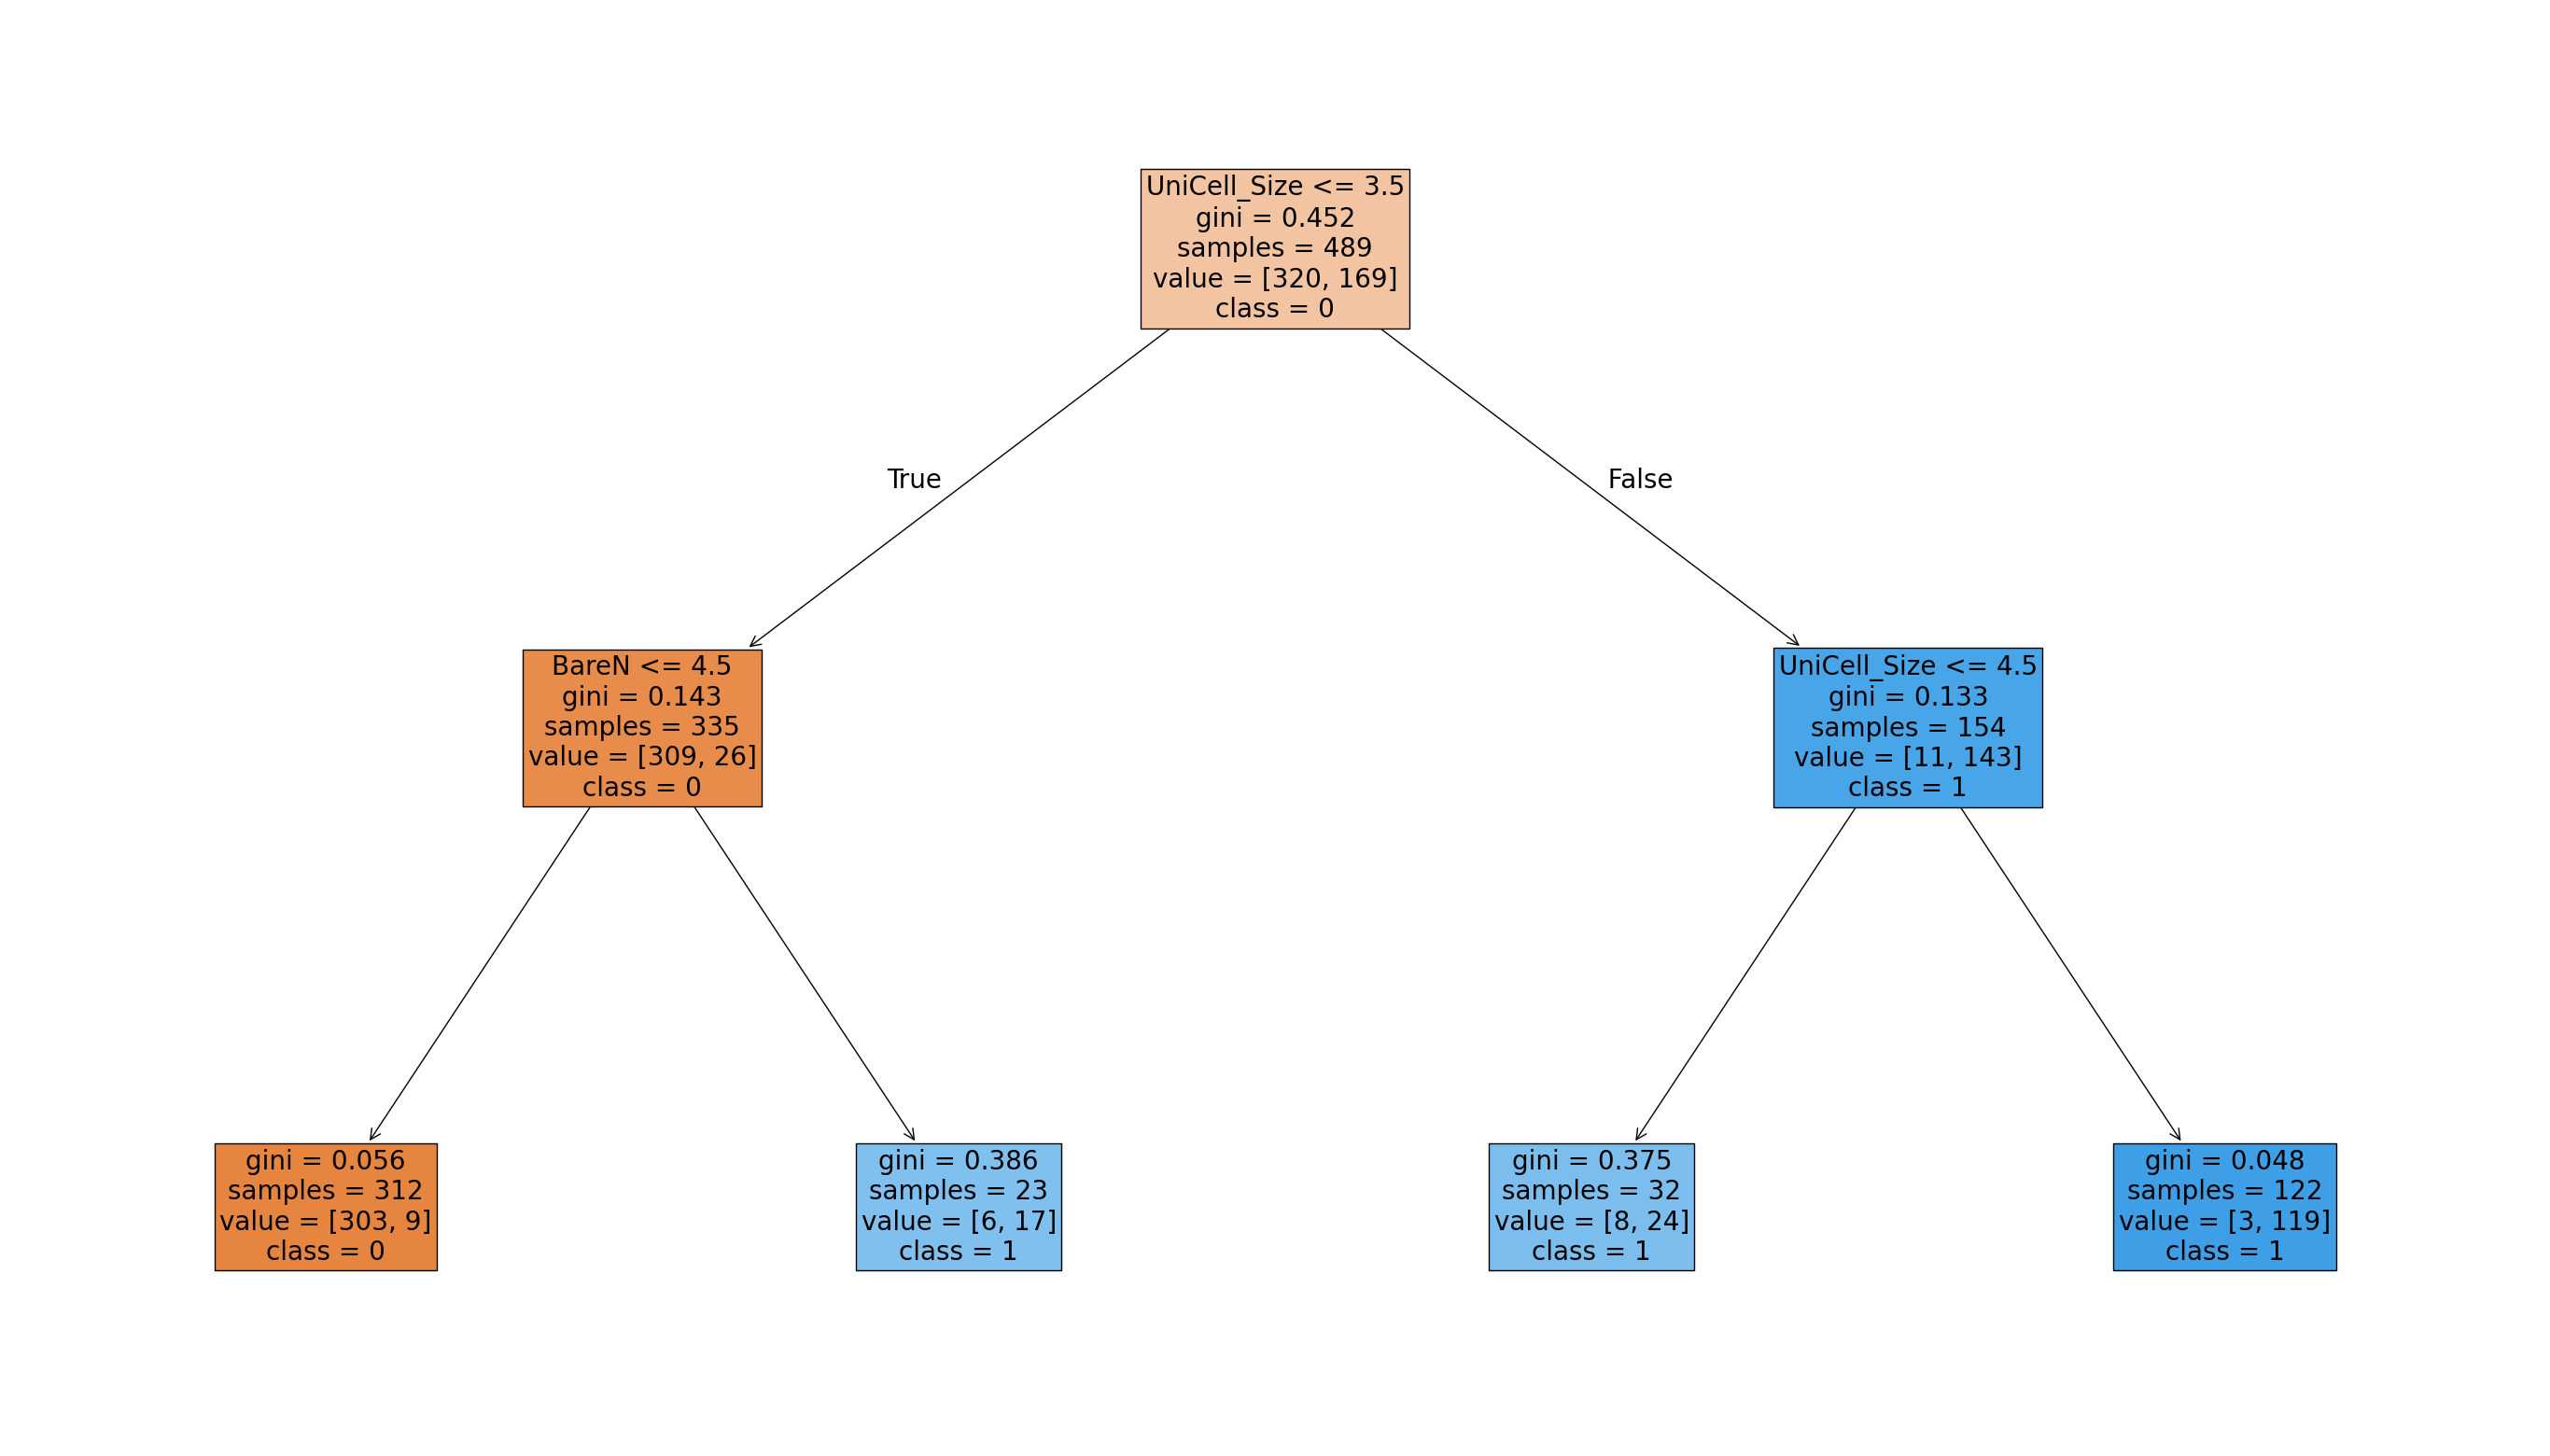

In [33]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=2)
dtc.fit(X_train, y_train)

plt.figure(figsize=(35,20))

plot_tree(dtc, feature_names=list(X.columns), class_names=['0','1'], filled= True, fontsize=20)
plt.show()

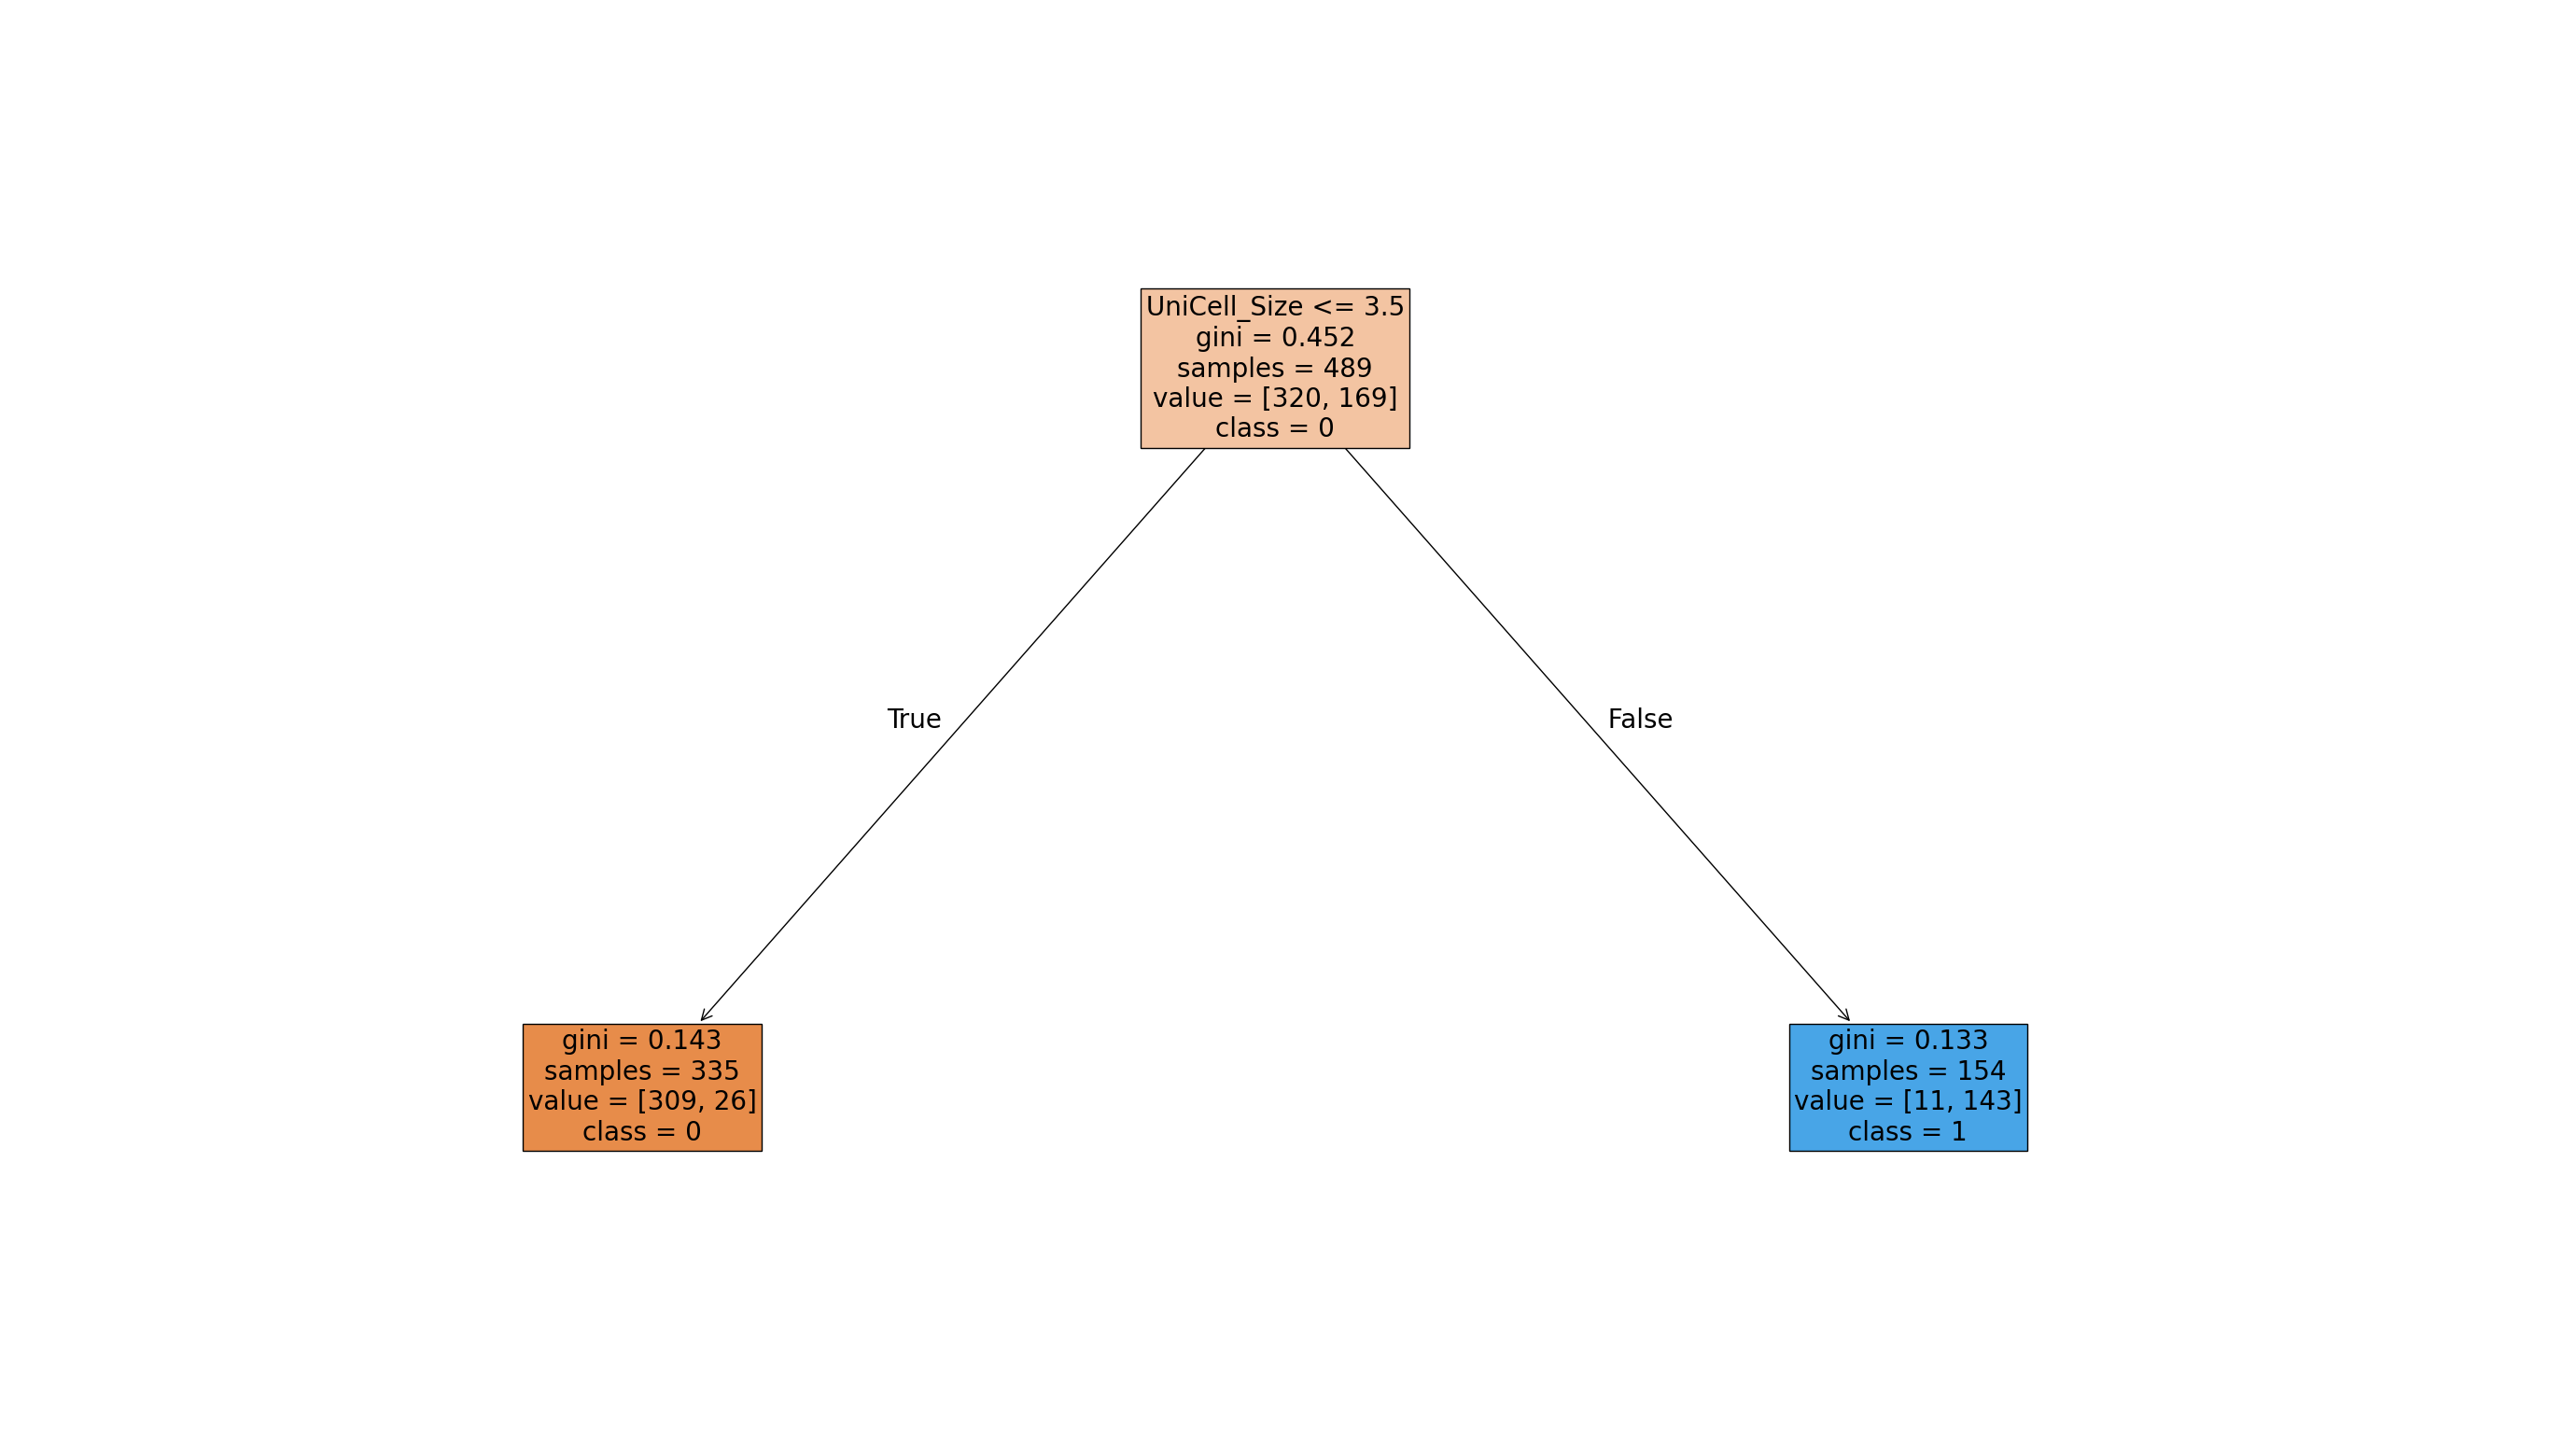

In [34]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=1)
dtc.fit(X_train, y_train)

plt.figure(figsize=(35,20))

plot_tree(dtc, feature_names=list(X.columns), class_names=['0','1'], filled= True, fontsize=20)
plt.show()

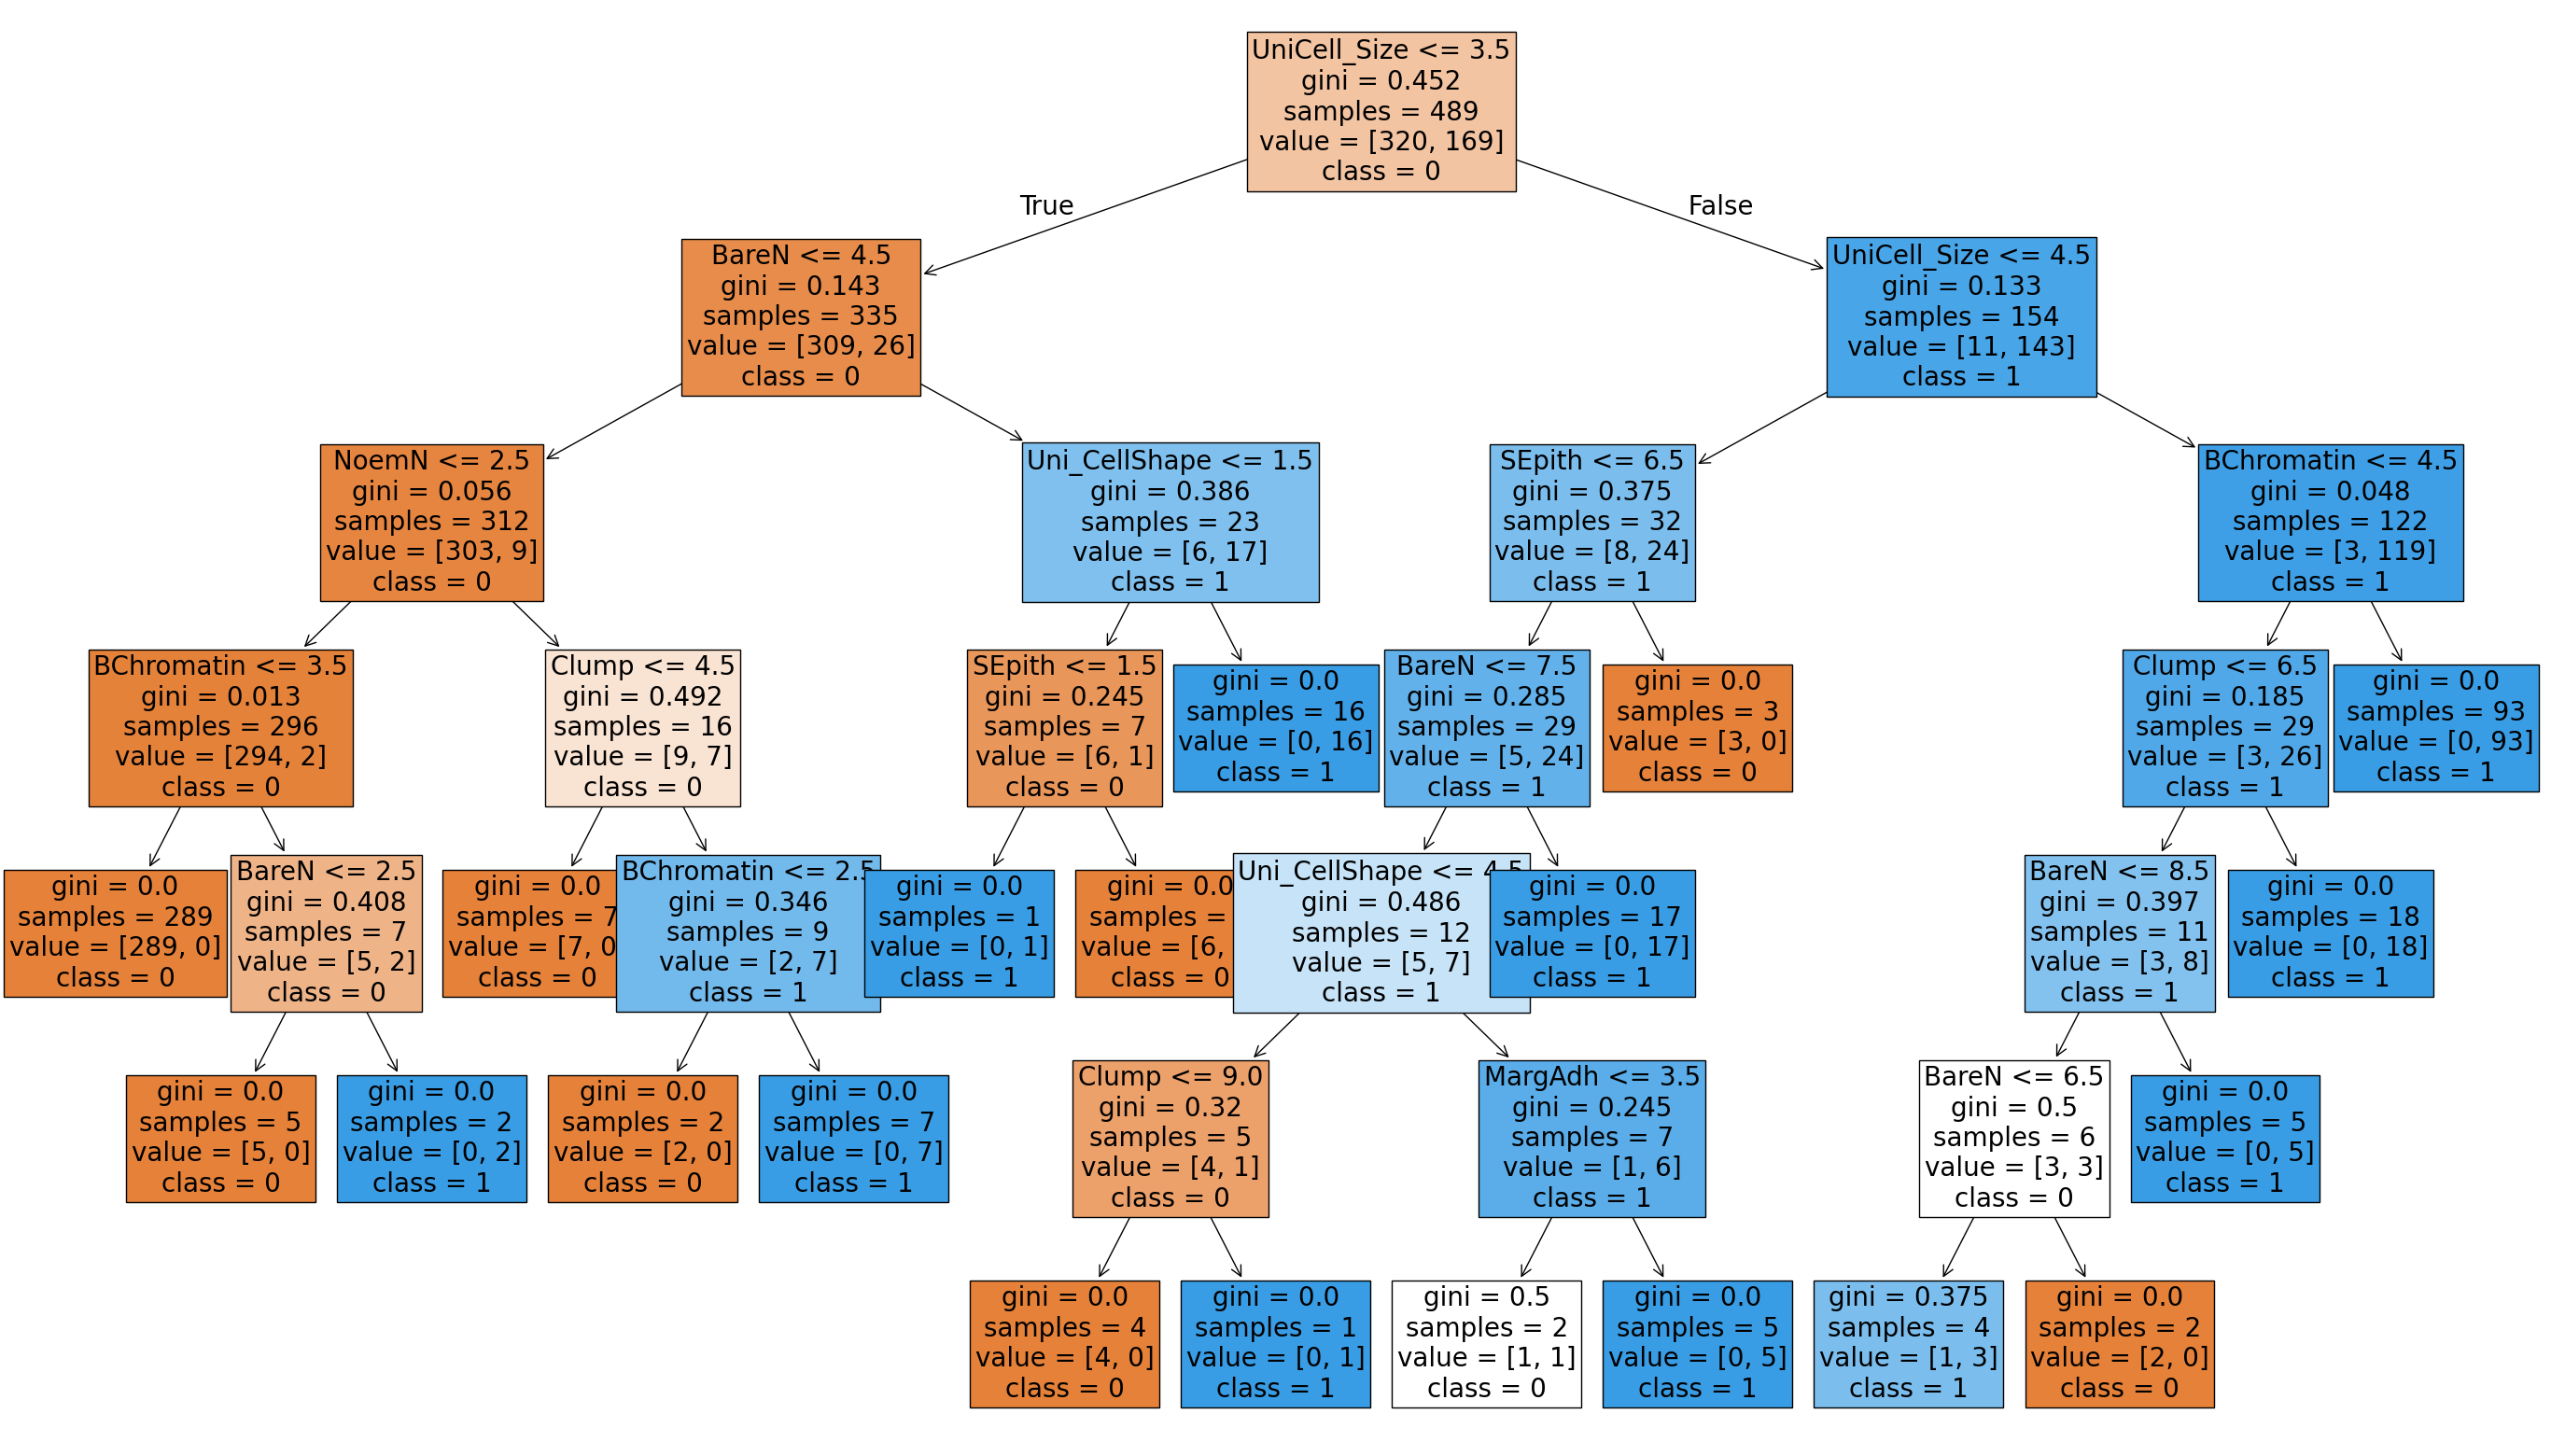

In [35]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=6)
dtc.fit(X_train, y_train)

plt.figure(figsize=(35,20))

plot_tree(dtc, feature_names=list(X.columns), class_names=['0','1'], filled= True, fontsize=20)
plt.show()

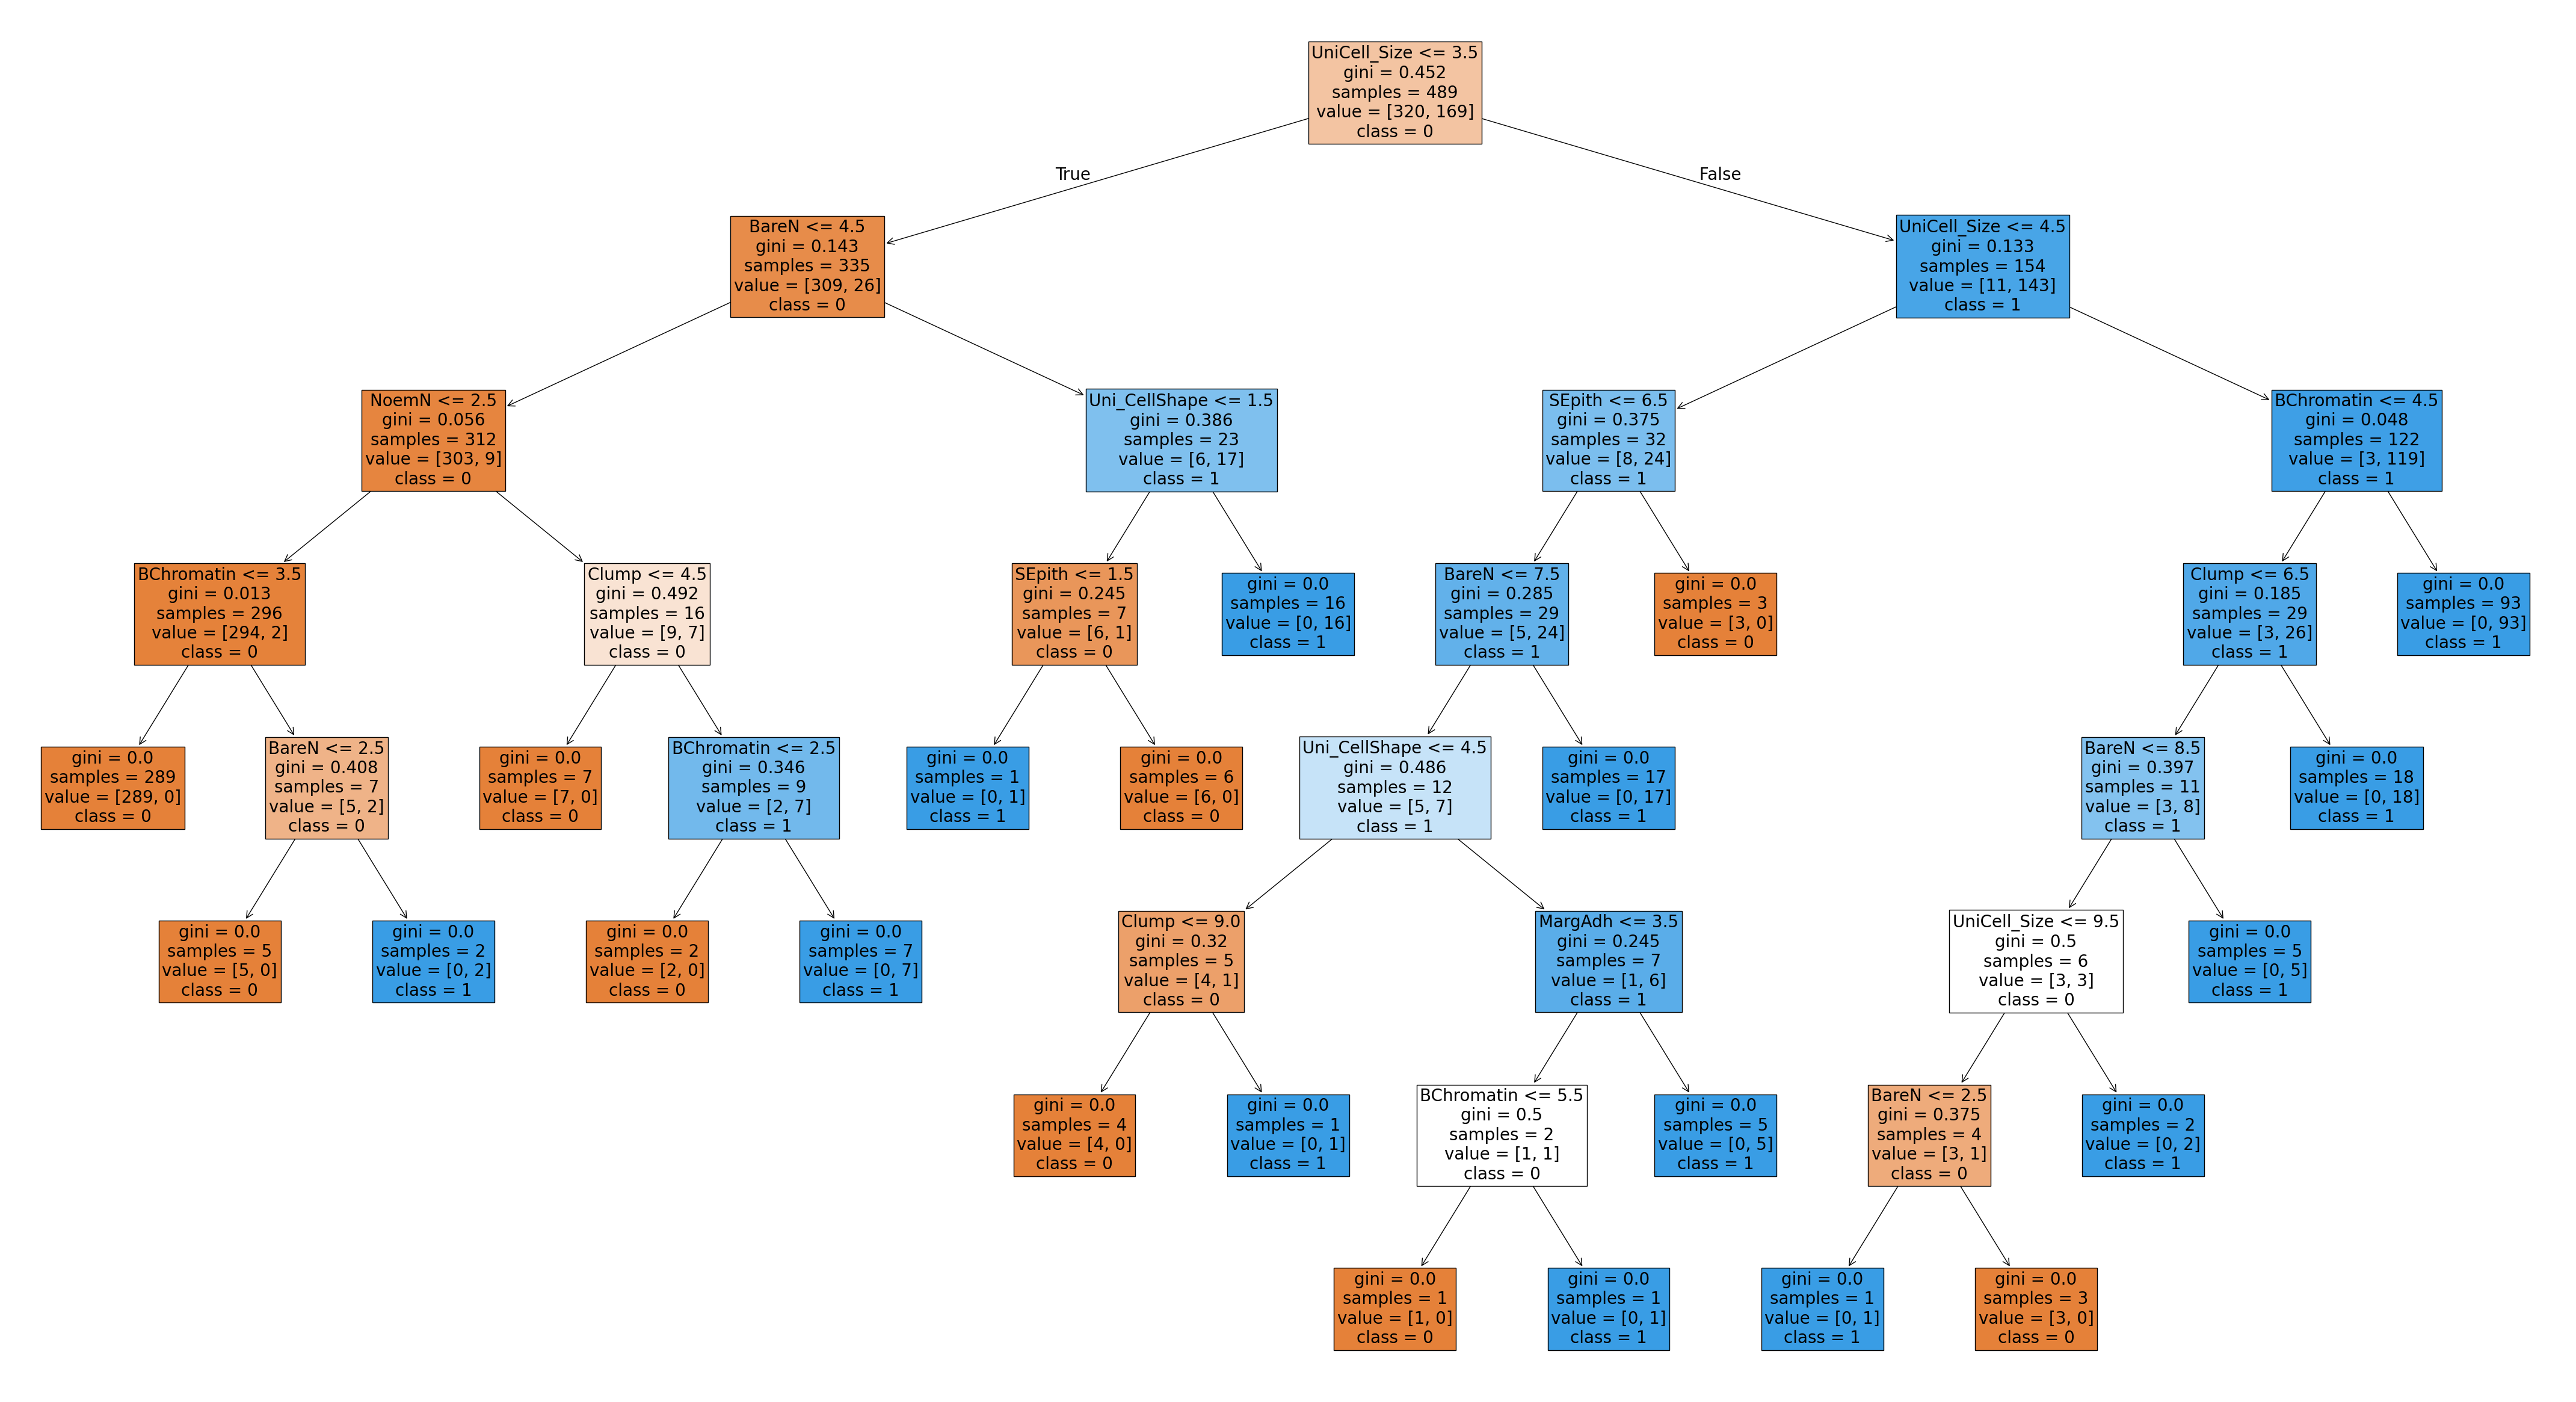

In [37]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=10)
dtc.fit(X_train, y_train)

plt.figure(figsize=(55,30))

plot_tree(dtc, feature_names=list(X.columns), class_names=['0','1'], filled= True, fontsize=20)
plt.show()

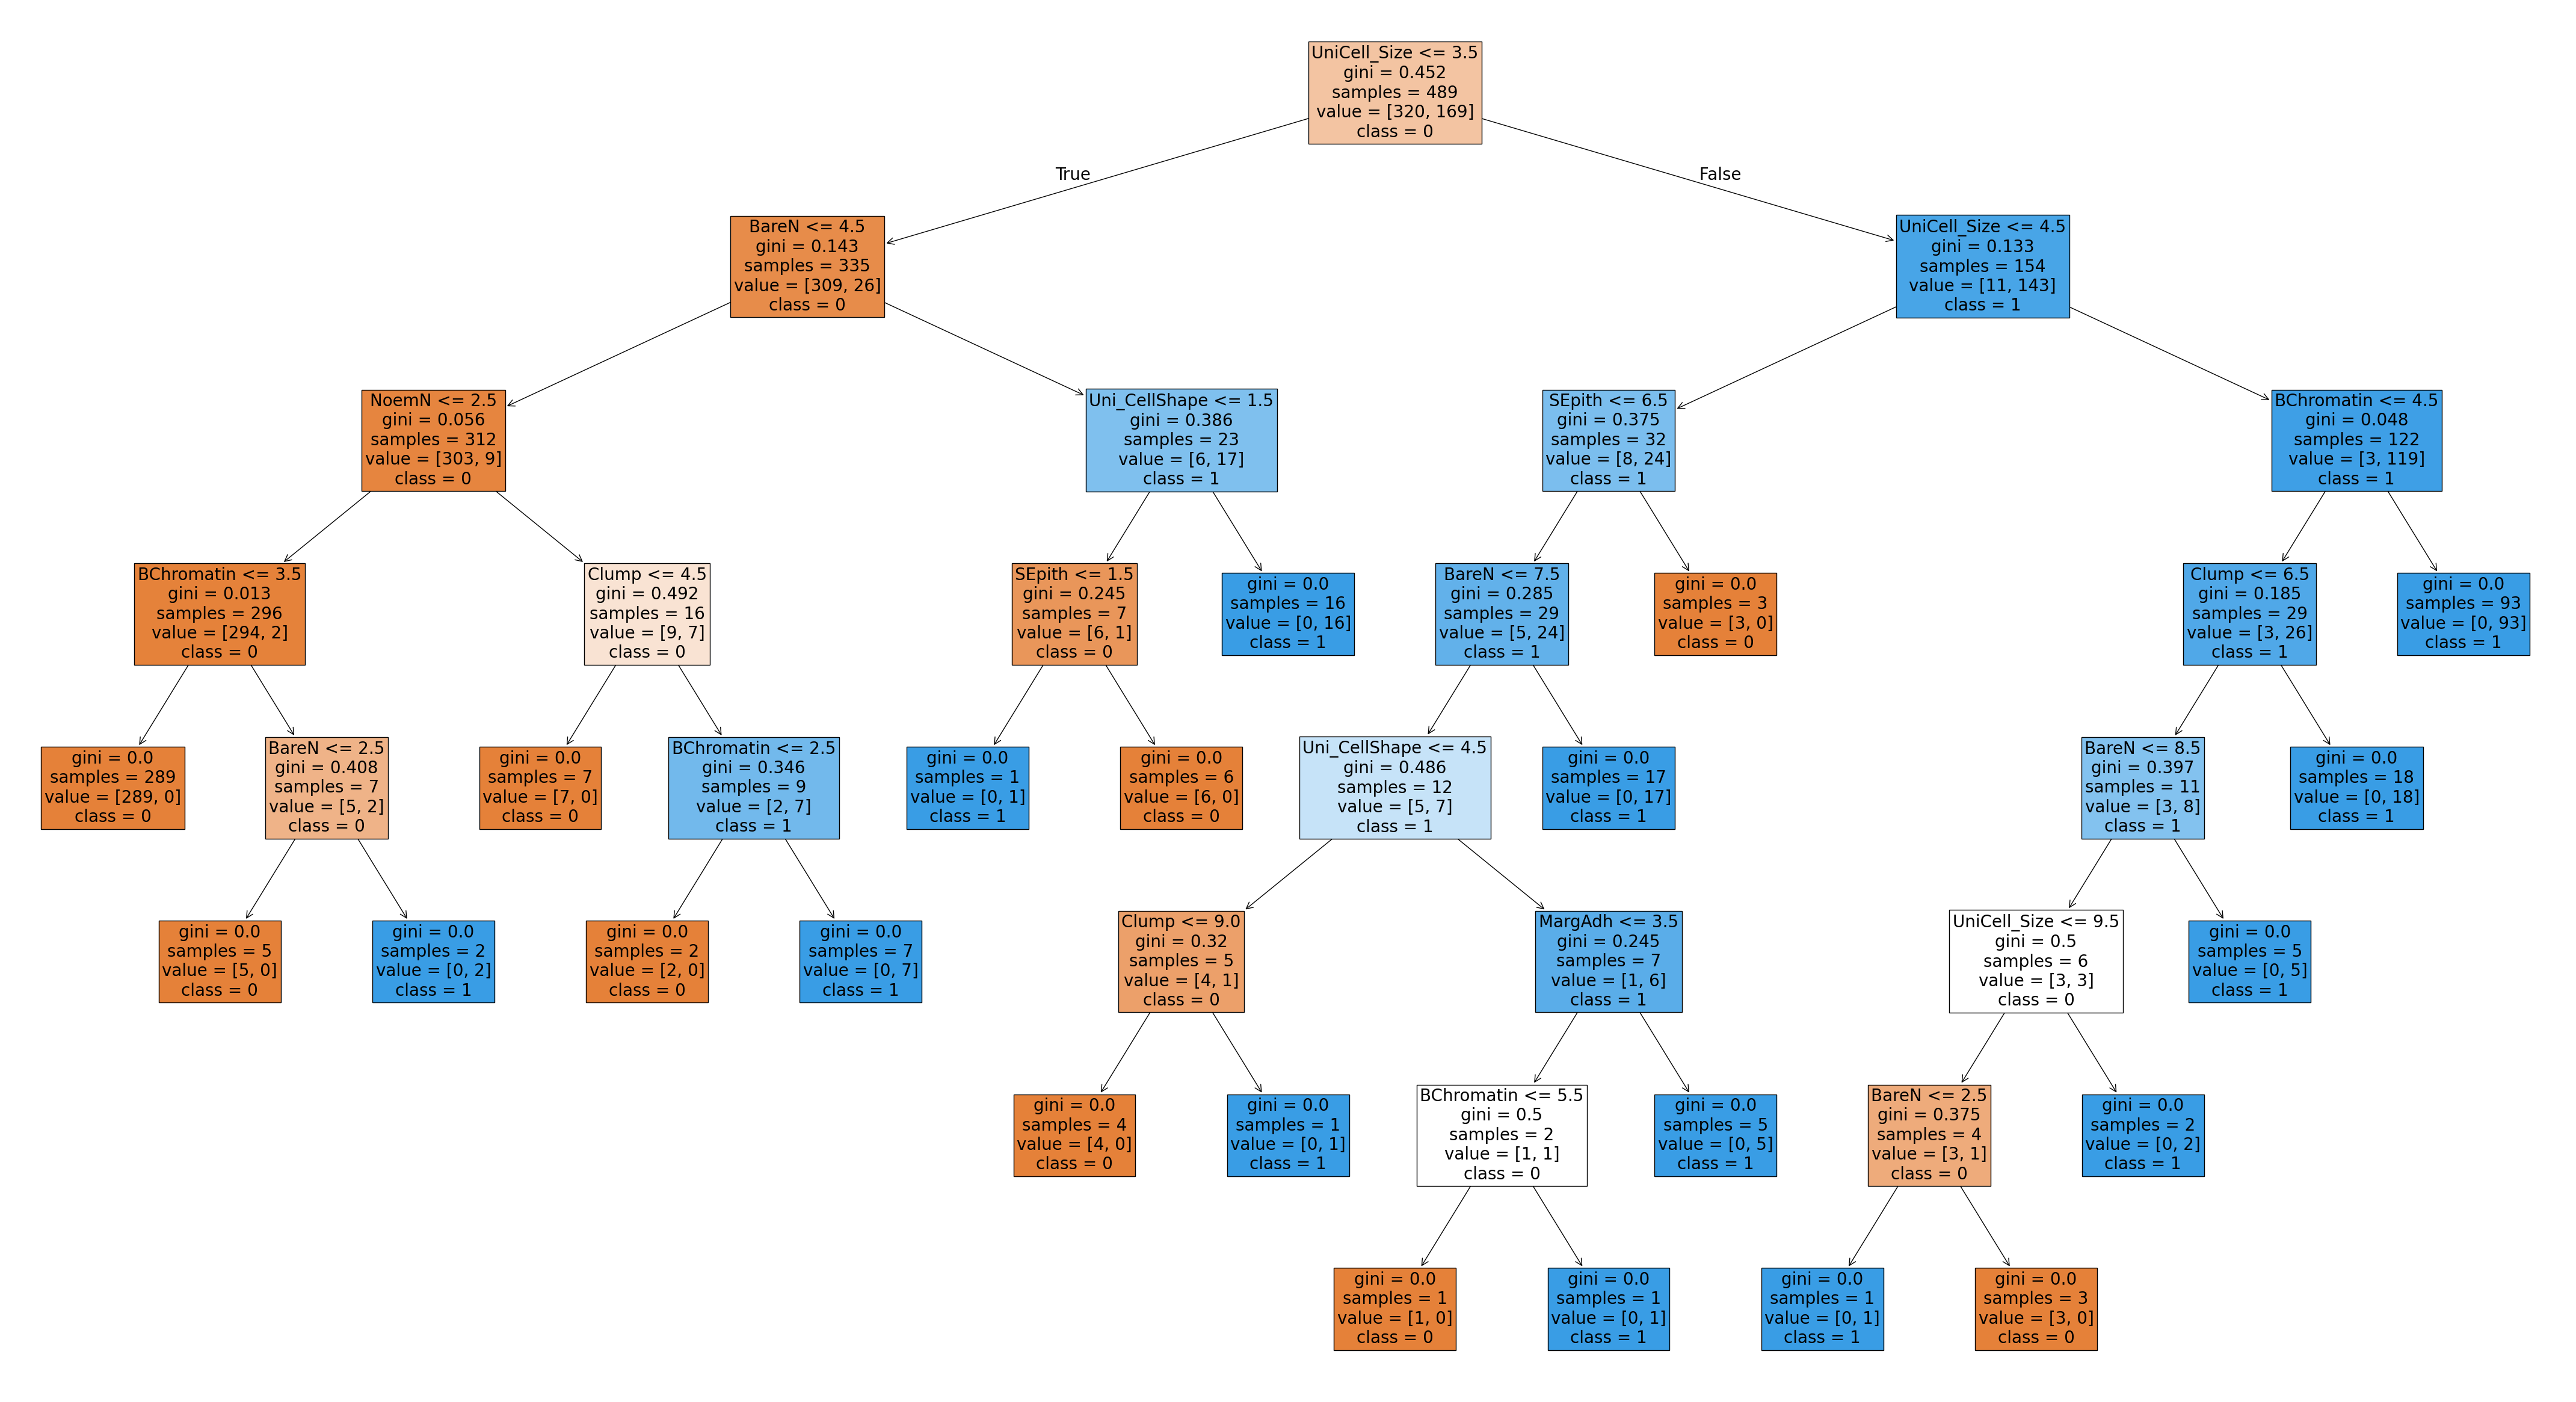

In [40]:
dtc = DecisionTreeClassifier(random_state=24, max_depth=None)
dtc.fit(X_train, y_train)

plt.figure(figsize=(55,30))

plot_tree(dtc, feature_names=list(X.columns), class_names=['0','1'], filled= True, fontsize=20)
plt.show()

### GridSearch CV

In [46]:
dtc = DecisionTreeClassifier(random_state=24)
params= {'max_depth' : [2,3,4,5,6, None]}
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv = GridSearchCV(dtc,param_grid=params,cv=kfold,scoring='roc_auc')
gcv.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=24),
             param_grid={'max_depth': [2, 3, 4, 5, 6, None]},
             scoring='roc_auc')

In [47]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 4}
0.9653115056342652


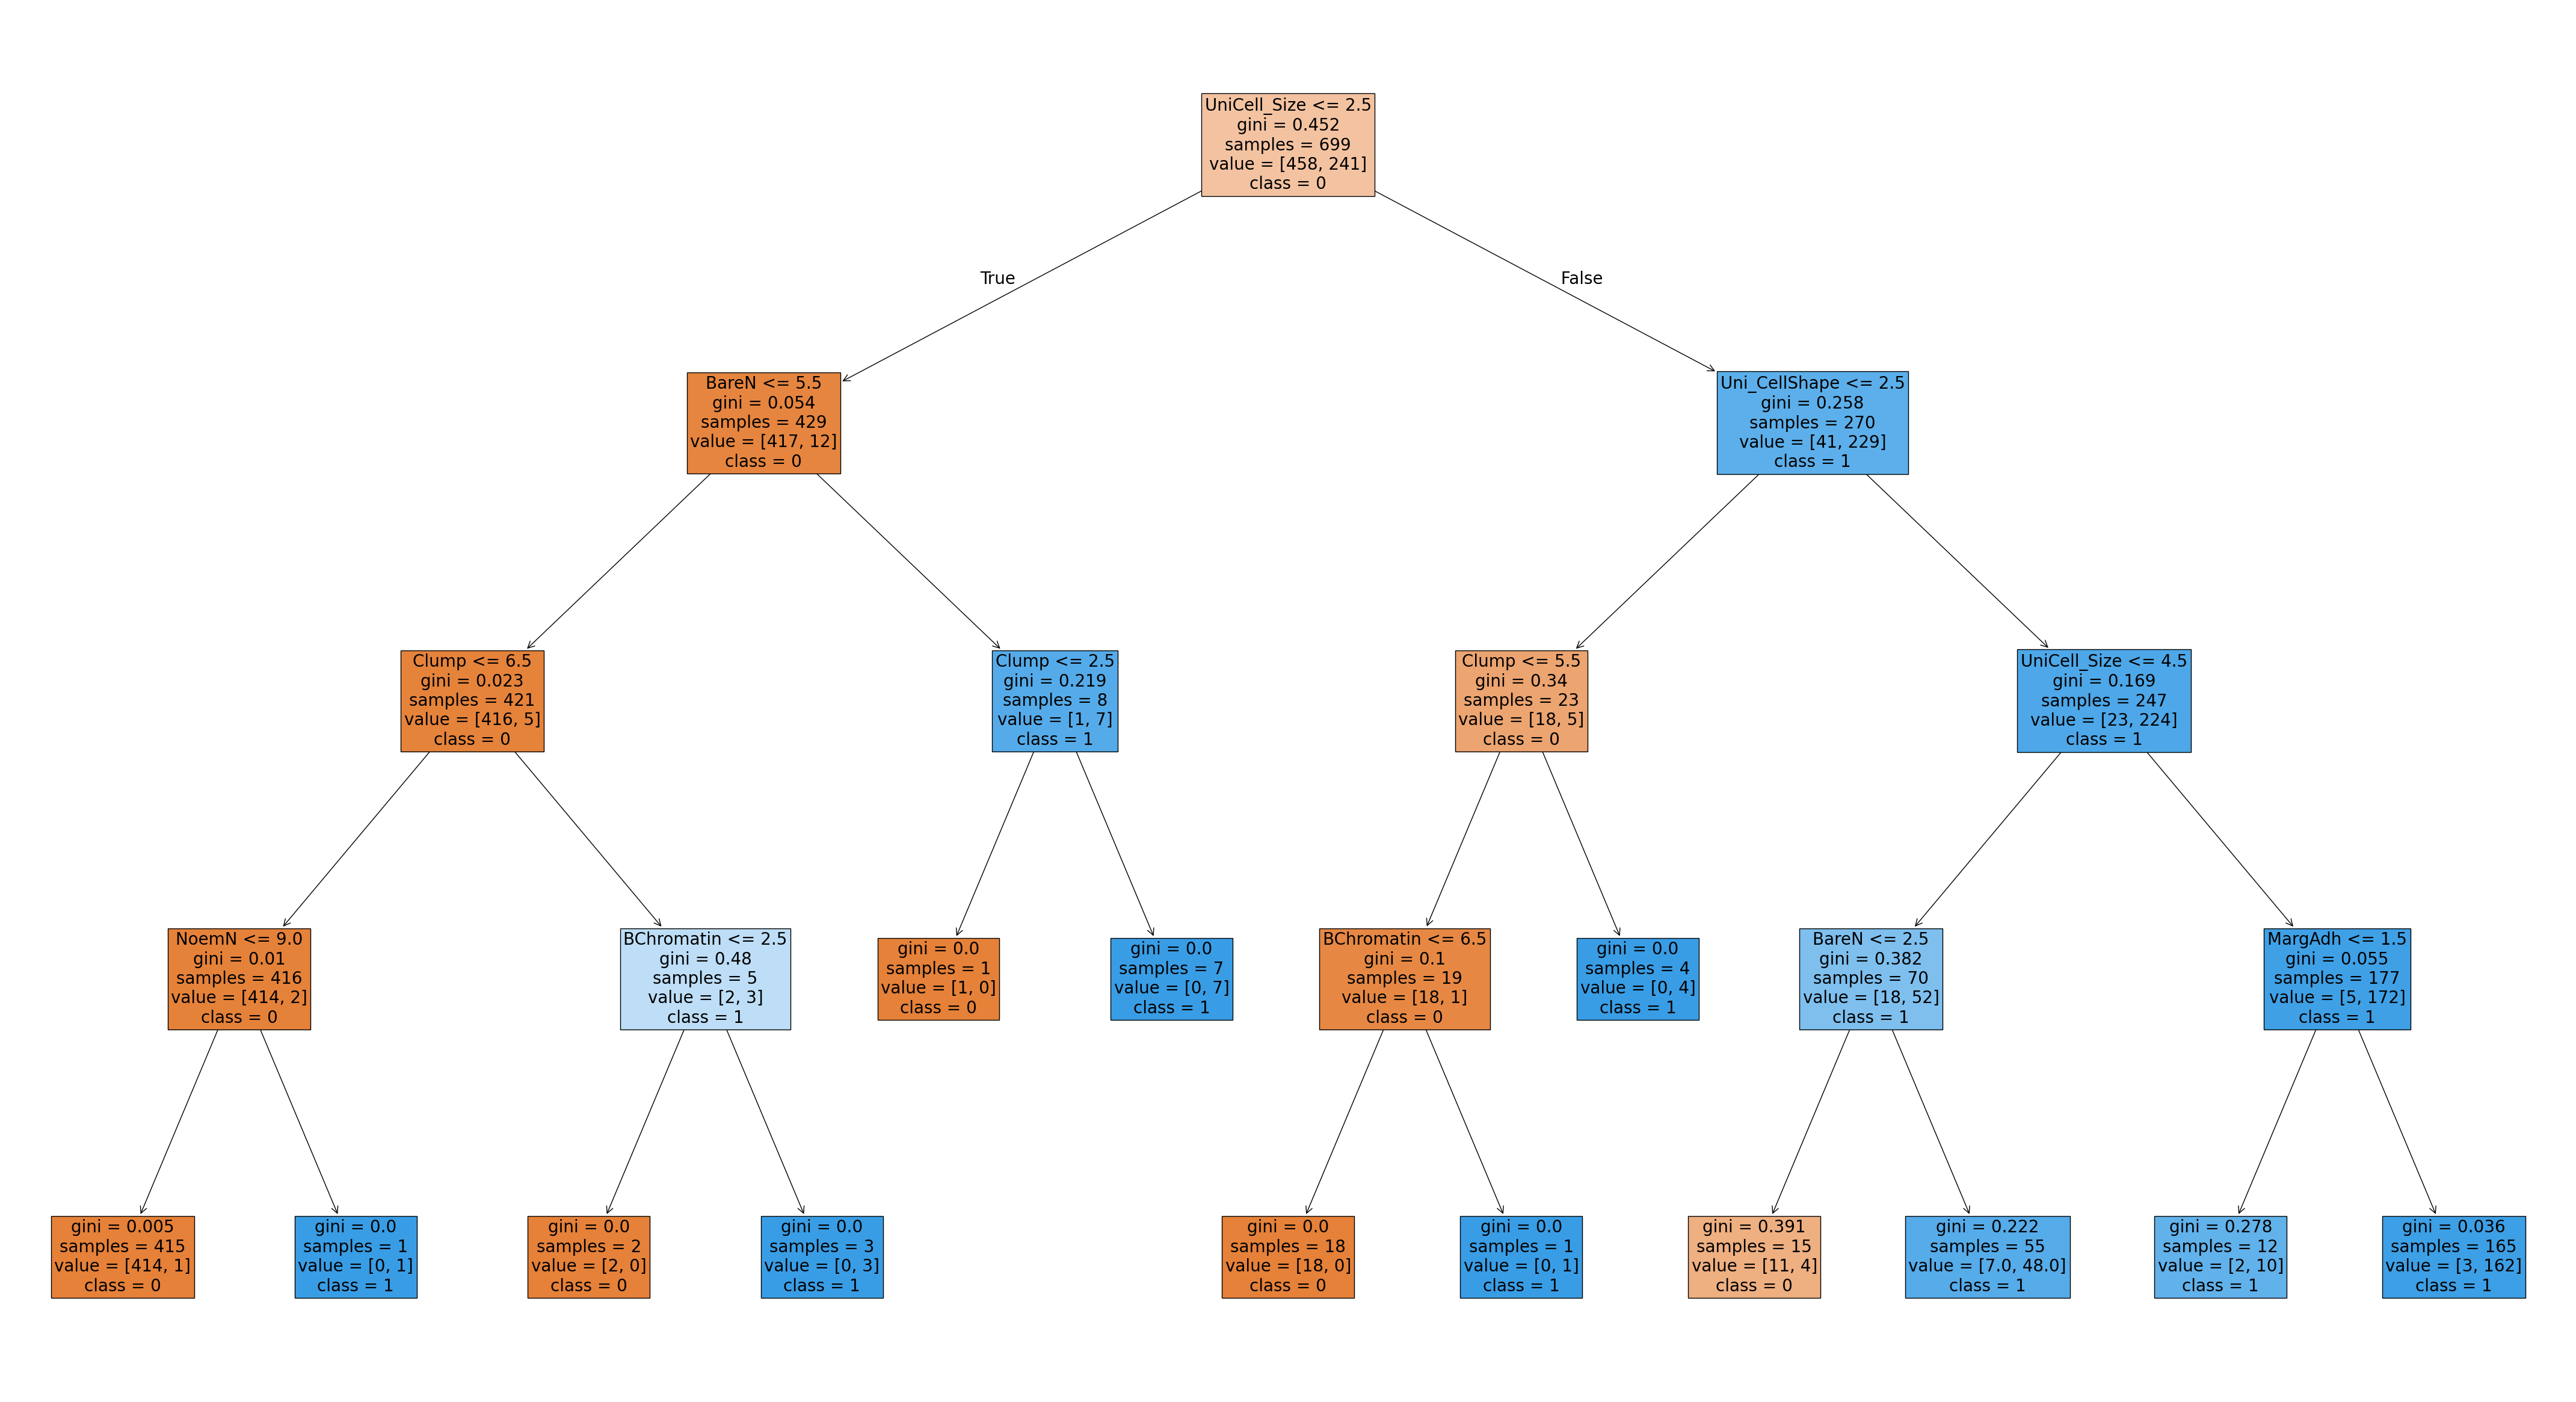

In [41]:
best_tree= gcv.best_estimator_

plt.figure(figsize=(55,30))

plot_tree(best_tree, feature_names=list(X.columns), class_names=['0','1'], filled= True, fontsize=20)
plt.show()

In [48]:
cancer.columns

Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses', 'Class'],
      dtype='object')

In [49]:
print(best_tree.feature_importances_)
print(X.columns)

[0.03902731 0.79646159 0.06982402 0.00172164 0.         0.07104555
 0.0149897  0.0069302  0.        ]
Index(['Clump', 'UniCell_Size', 'Uni_CellShape', 'MargAdh', 'SEpith', 'BareN',
       'BChromatin', 'NoemN', 'Mitoses'],
      dtype='object')


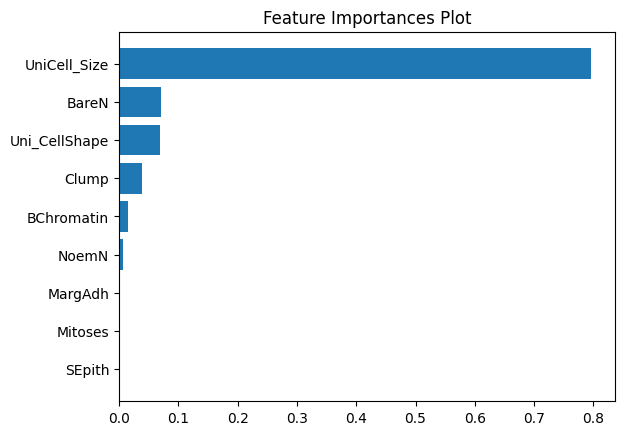

In [54]:
df_imp= pd.DataFrame({'feature':list(X.columns),
               'importance':best_tree.feature_importances_})
df_imp.sort_values('importance', inplace=True)
plt.barh(df_imp['feature'], df_imp['importance'])
plt.title("Feature Importances Plot")
plt.show()